# Описание данных.

В данной работе мы напишем нейронную сеть, которая будет распознавать категории объектов на изображении.<br>Для этого с просторов интернета мы выгрузили данные CIFAR-10, которые представляют собой набор изображений, разделенных на 10 классов. Каждое изображение имеет размер 32x32 пикселя и относится к одному из следующих классов:<br>Airplane (Самолет);<br>Automobile (Автомобиль);<br>Bird (Птица);<br>Cat (Кошка);<br>Deer (Олень);<br>Dog (Собака);<br>Frog (Лягушка);<br>Horse (Лошадь);<br>Ship (Корабль);<br>Truck (Грузовик).

# Загрузка данных.

Импортируем библиотеки и выгрузим данные.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout

2024-05-03 13:45:46.822939: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
classes = ['Самолет', 'Автомобиль', 'Птица', 'Кот', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

Посмотрим, какое изображение располагается под индекосом '333'.

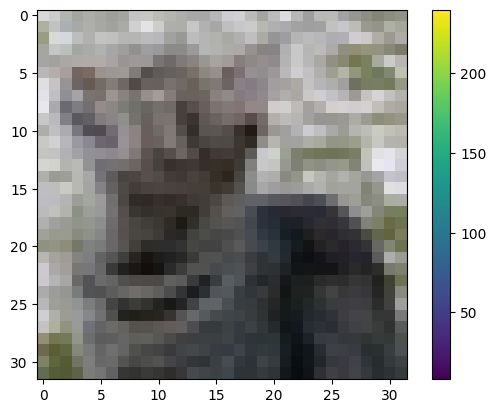

In [4]:
plt.figure()
plt.imshow(X_train[333])
plt.colorbar()

Видим, что это кот (похож).<br>Теперь нам необходимо провести нормализацию данных с помощью деления на 255, чтобы значения пикселей оказались в диапазоне от 0 до 1. И тут же преобразуем метки классов в категориальные переменные (one-hot encoding).

In [5]:
X_train = X_train/255
X_test = X_test/255
y_test = to_categorical(y_test, num_classes=10)
y_train = to_categorical(y_train, num_classes=10)

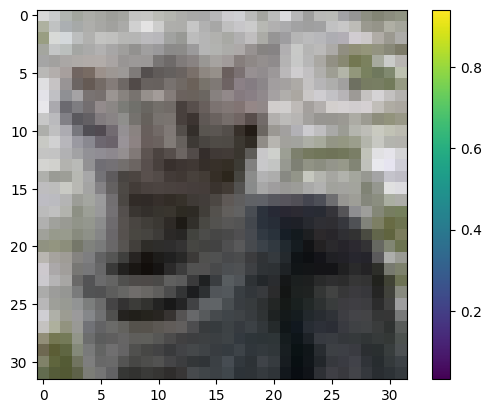

In [6]:
plt.figure()
plt.imshow(X_train[333])
plt.colorbar()

Сейчас данные готовы к обучению.<br>Однако, прежде чем приступить к нему, посмотрим на первые 25 изображений из обучающего набора данных.

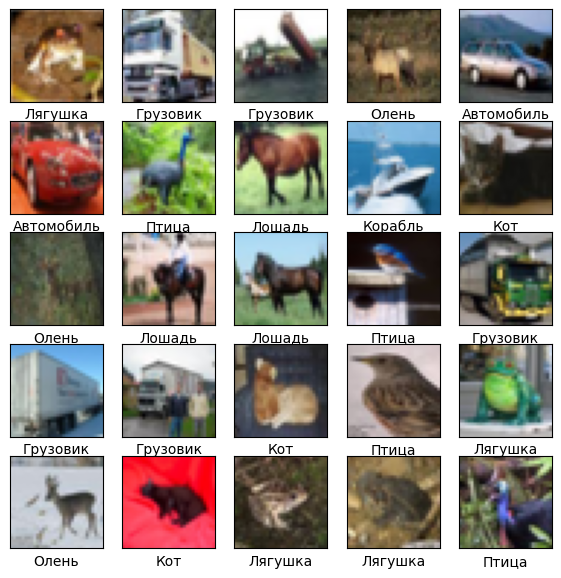

In [7]:
plt.figure(figsize=(7, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    class_index = np.argmax(y_train[i])
    plt.xlabel(classes[class_index])

plt.show()

# Обучение модели.

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.3755 - loss: 1.7065
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.6183 - loss: 1.0834
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.6817 - loss: 0.9119
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 57ms/step - accuracy: 0.7102 - loss: 0.8264
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.7341 - loss: 0.7541
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.7538 - loss: 0.7036
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.7575 - loss: 0.6826
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.7697 - loss: 0.6538
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.7788 - loss: 0.6285
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.7838 - loss: 0.6069


In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', round(test_acc, 2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7547 - loss: 0.7258
Test accuracy: 0.75


Мы обучили модель Sequential.<br>Для этого был создан объект модели, который представляет собой линейный стек слоев.<br>Затем были добавлены необходимые слои, а именно: Conv2D слои, MaxPooling2D слои, Dropout слои, Flatten слой и Dense слой.<br>Далее была проведена компиляция модели с оптимизатором Adam, функцией потерь categorical_crossentropy и метрикой точности (accuracy).<br>И, наконец, модель была обучена на тренировачных данных в течение 10 эпох.<br>Метрика точности (accuracy) равна 0.75, а это значит, что примерно в 75% случаев модель правильно классифицировала изображения в тестовом наборе данных.

# Предсказание.

In [10]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [11]:
predictions[444]

array([2.5600841e-04, 5.2269479e-06, 3.0047918e-02, 3.7104973e-01,
       6.2085524e-02, 5.1802492e-01, 9.5497090e-03, 9.9869620e-04,
       7.1607078e-03, 8.2159130e-04], dtype=float32)

In [12]:
y_test[444]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [13]:
classes[np.argmax(predictions[444])]

'Собака'

Мы выполнили предсказание на тестовом наборе данных. Далее получили вероятности, которые показывают к какому классу (скорее всего) относится указанное изображение. В нашем случае что изображение под индексом '444', вероятнее всего, относится к 5 классу, то есть к 'собаке'.<br>Визуализируем изображение и посмотрим, что на нем на самом деле.

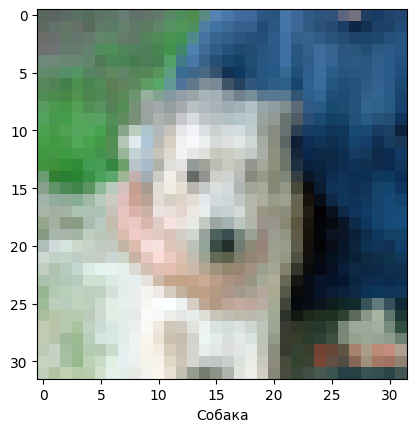

In [14]:
plt.figure()
plt.imshow(X_test[444])
class_index = np.argmax(y_test[i])
plt.xlabel(classes[class_index])
plt.show()

Действительно, на изображение собака.<br>Попробуем вывести первые 10 изображений нашего предсказания на тестовой выборке.

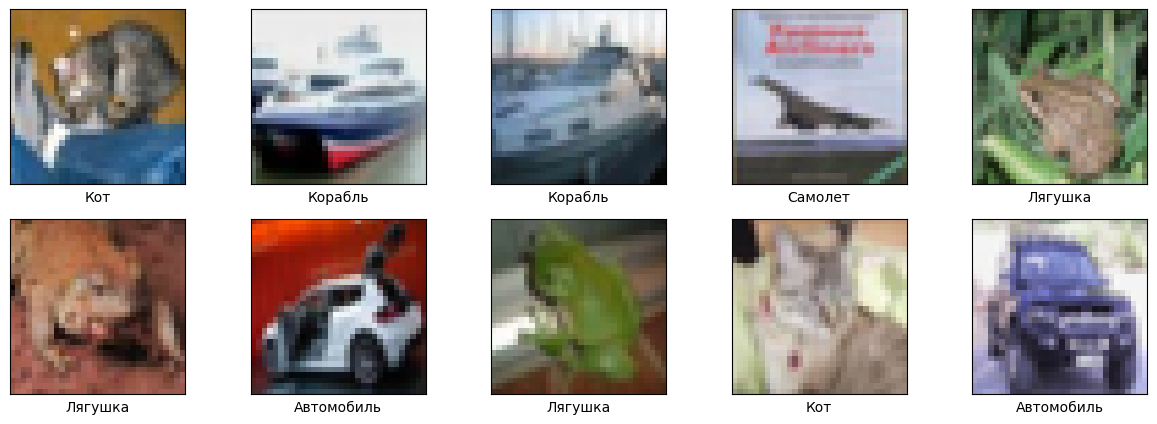

In [15]:
predict = predictions[:10]

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i])
    predicted_class = np.argmax(predict[i])
    plt.xlabel(classes[predicted_class])

plt.show()

Все совпадает, а значит наша модель неплохо обучилась!

# Общий вывод.

В ходе данного проекта была разработана нейронная сеть для классификации изображений набора данных CIFAR-10.<br>Модель Sequential была построена с использованием различных типов слоев, чтобы извлечь признаки из изображений и классифицировать их по 10 классам объектов. После компиляции модели, мы обучили ее на тренировочных данных в течение 10 эпох. Модель достигла точности в 75%, что означает, что в примерно 3 из 4 случаев она правильно классифицировала изображения в тестовом наборе данных. После этого были выполнены предсказания на тестовых данных, и результаты совпали с ожидаемыми классами в большинстве случаев.Таким образом, модель успешно обучена и способна правильно классифицировать изображения CIFAR-10.